# Convolutional Neural Network
## A CNN is designed to automatically and adaptively learn spatial hierarchies of features through backpropagation by using convolutions, pooling, and fully connected layers.

# Typical CNN Architecture
Input Image → Layer(Conv) → Activationfunc(ReLU) → PoolingLayer(MAX or AVG) → Conv → ReLU → Pool → FullyConnected or Dense layers(FC) → Output

# EX - 1
## mnist digit dataset from keras datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras

In [30]:
from keras.datasets import mnist

In [31]:
mnist=mnist.load_data()

In [32]:
(x_train,y_train) ,(x_test,y_test) = mnist

In [33]:
len(x_test)

10000

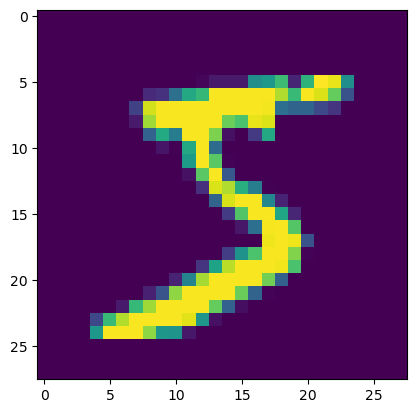

In [34]:
plt.imshow(x_train[0])

In [35]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [36]:
x_train_scaled.shape

(60000, 28, 28)

In [37]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
cnn = keras.Sequential([
    #cnn 
    keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((3, 3)),

    keras.layers.Conv2D(32,(4,4),activation='relu'),
    keras.layers.MaxPooling2D((3, 3)),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 5, 32)            │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,722 (77.04 KB)

 Trainable params: 19,722 (77.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [40]:
cnn.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8174 - loss: 0.5822
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9642 - loss: 0.1137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9741 - loss: 0.0863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9789 - loss: 0.0666
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9828 - loss: 0.0572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9831 - loss: 0.0535
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9843 - loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9873 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9888 - loss: 0.0353
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9885 - loss: 0.0353


In [41]:
loss,accuracy = cnn.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0765


In [42]:
accuracy

0.9829000234603882

THIS MODEL PERFECTLYFITTING BECAUSE TESTSCORE ACCURACY AND TRAINSCORE ACCURACY ARE ALMOST EQUAL OR SIMILAR

# EX - 2
## cifar10 dataset

In [15]:
from keras.datasets import cifar10

In [16]:
data = cifar10.load_data()

In [17]:
(x_train,y_train),(x_test,y_test) = data

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_test_scaled = x_test / 255
x_train_scaled = x_train / 255

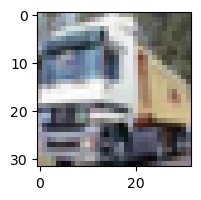

In [20]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[1])

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#model

In [22]:
cnn_model = keras.Sequential([
    # cnn
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
cnn_model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3574 - loss: 1.7448
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5814 - loss: 1.1882
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6412 - loss: 1.0264
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6773 - loss: 0.9387
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6987 - loss: 0.8717
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7223 - loss: 0.8021
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7312 - loss: 0.7772
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7478 - loss: 0.7270
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7605 - loss: 0.6884
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7748 - loss: 0.6534
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7846 - loss: 0.6236
Epoch 12

In [25]:
loss,accuracy = cnn_model.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6986 - loss: 1.0770


In [26]:
loss

1.0865119695663452

In [27]:
accuracy

0.6898000240325928

THIS MODEL OVERFITTING BECAUSE TESTSCORE ACCURACY IS GREATERTHAN TRAINSCORE ACCURACY